# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys

"""
Add gym-hiring directory to current path. I believe this is needed
when referencing a pip "file:///" dependency.
"""
for p in ['..', '../..', '../../..', '../../../..']:
    d = os.path.abspath(p)
    if d not in sys.path:
        sys.path.insert(0,d)
        
%load_ext autoreload

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=1.2)

# Experiment Helpers

In [14]:
from abc import ABC, abstractmethod


class Agent(ABC):
    def __init__(self, env):
        self.env = env
        
    @abstractmethod
    def select_action(self, obs, eps=None):
        pass
    
    @abstractmethod
    def add_experience(self, prev_obs, action, reward, obs, done):
        pass

    @abstractmethod
    def train(self, timestep):
        pass
    
    
class RandomAgent(Agent):
    
    def __init__(self, env):
        self.env = env
        
    def select_action(self, obs, eps=None):
        # Sample random action
        a = np.random.choice(
            np.arange(self.env.n_actions),
            p=(np.ones(self.env.n_actions)/self.env.n_actions))
        return a
    
    def add_experience(self, prev_obs, action, reward, obs, done):
        pass

    def train(self, timestep):
        pass
    
    
class FixedPolicyAgent(Agent):
    
    def __init__(self, env, pi):
        self.env = env
        self.pi = pi
        
    def select_action(self, obs, eps=None):
        a = self.pi[obs]
        return a
    
    def add_experience(self, prev_obs, action, reward, obs, done):
        pass

    def train(self, timestep):
        pass

# Experiment

In [36]:
%autoreload 2
    
import gym
from research.rl.env.helpers import play_n_episodes
from research.rl.env.discrete_mdp import DiscreteMDP, compute_optimal_policy

In [37]:
"""
Env specific parameters
"""
S = (0, 1, 2, 3)
A = (0,1)
Omega = (0, 1, 2, 3)
gamma = .9
mu0 = np.ones(len(S)) / len(S)
Rsp = np.array([0, 1, 1, 2])
mu0 = np.ones(len(S)) / len(S)
T = np.zeros((len(S), len(A), len(S)))
T[0][0][0] = 1
T[0][1] = .25 * np.ones(4)
T[1][0][1] = 1
T[1][1][3] = .6
T[1][1][0] = .4
T[2][0][2] = 1
T[2][1][3] = .4
T[2][1][0] = .6
T[3][0][3] = 0
T[3][0][1] = .5
T[3][0][2] = .5
T[3][1][3] = 1

Ospo = np.identity(len(S))

episode: 0, total reward: 90.00, eps: 0.000, avg reward last 100: 90.000
episode: 100, total reward: 101.00, eps: 0.000, avg reward last 100: 100.802
episode: 200, total reward: 103.00, eps: 0.000, avg reward last 100: 99.871
episode: 300, total reward: 89.00, eps: 0.000, avg reward last 100: 99.752
episode: 400, total reward: 87.00, eps: 0.000, avg reward last 100: 100.743
episode: 500, total reward: 103.00, eps: 0.000, avg reward last 100: 100.673
episode: 600, total reward: 111.00, eps: 0.000, avg reward last 100: 100.663
episode: 700, total reward: 78.00, eps: 0.000, avg reward last 100: 99.931
episode: 800, total reward: 112.00, eps: 0.000, avg reward last 100: 99.376
episode: 900, total reward: 87.00, eps: 0.000, avg reward last 100: 98.901

Total steps: 1,000
Avg cumulative reward: 100.062
Avg reward for last 100 episodes: 99.610
0.54 Avg action of first episode


(0.0, 210.0)

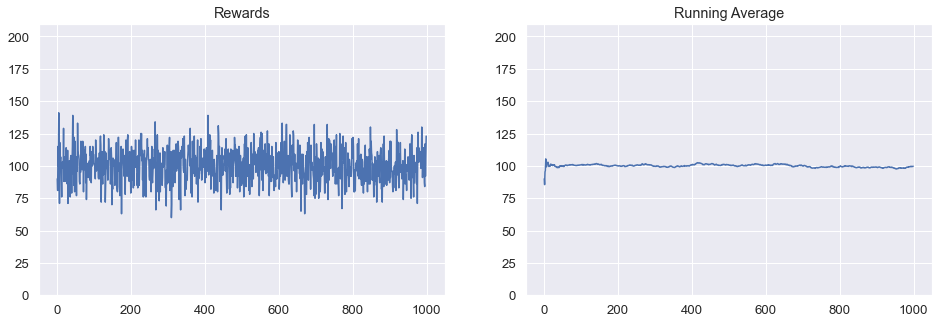

In [68]:
env = DiscreteMDP(mu0=mu0,
                  T=T,
                  max_steps_per_episode=100,
                  Rsp=Rsp,
                  Ospo=Ospo)

agent = RandomAgent(env)

ax0, ax1 = play_n_episodes(env, agent, n=1_000, use_eps=False)
print(f'{np.mean(env.action_episode_memory[1])} Avg action of first episode')
ax0.set_ylim([0, 210])
ax1.set_ylim([0, 210])

episode: 0, total reward: 200.00, eps: 0.000, avg reward last 100: 200.000
episode: 100, total reward: 200.00, eps: 0.000, avg reward last 100: 198.802
episode: 200, total reward: 197.00, eps: 0.000, avg reward last 100: 197.723
episode: 300, total reward: 200.00, eps: 0.000, avg reward last 100: 197.317
episode: 400, total reward: 200.00, eps: 0.000, avg reward last 100: 198.673
episode: 500, total reward: 196.00, eps: 0.000, avg reward last 100: 197.248
episode: 600, total reward: 200.00, eps: 0.000, avg reward last 100: 198.069
episode: 700, total reward: 192.00, eps: 0.000, avg reward last 100: 197.564
episode: 800, total reward: 200.00, eps: 0.000, avg reward last 100: 197.861
episode: 900, total reward: 200.00, eps: 0.000, avg reward last 100: 198.337

Total steps: 1,000
Avg cumulative reward: 197.919
Avg reward for last 100 episodes: 197.630
1.0 Avg action of first episode


(0.0, 210.0)

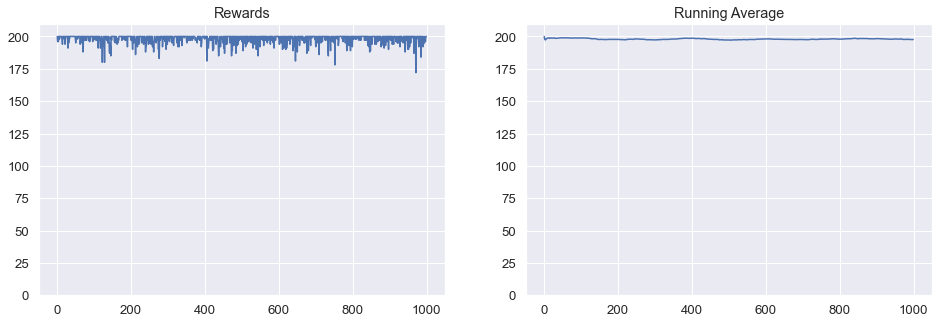

In [69]:
env = DiscreteMDP(mu0=mu0,
                  T=T,
                  max_steps_per_episode=100,
                  Rsp=Rsp,
                  Ospo=Ospo)

pi_opt = compute_optimal_policy(env, gamma=.99)
agent = FixedPolicyAgent(env, pi=pi_opt)

ax0, ax1 = play_n_episodes(env, agent, n=1_000, use_eps=False)
print(f'{np.mean(env.action_episode_memory[1])} Avg action of first episode')
ax0.set_ylim([0, 210])
ax1.set_ylim([0, 210])